In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part (a): Read the data
college = pd.read_csv("../Data/College.csv")

In [21]:
# Part (b): Fix the index
college = pd.read_csv("../Data/College.csv", index_col=0)
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [15]:
# Part (c): Numerical summary
print("Numerical Summary of Variables:")
print(college.describe())

Numerical Summary of Variables:
               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105

<Figure size 1000x1000 with 0 Axes>

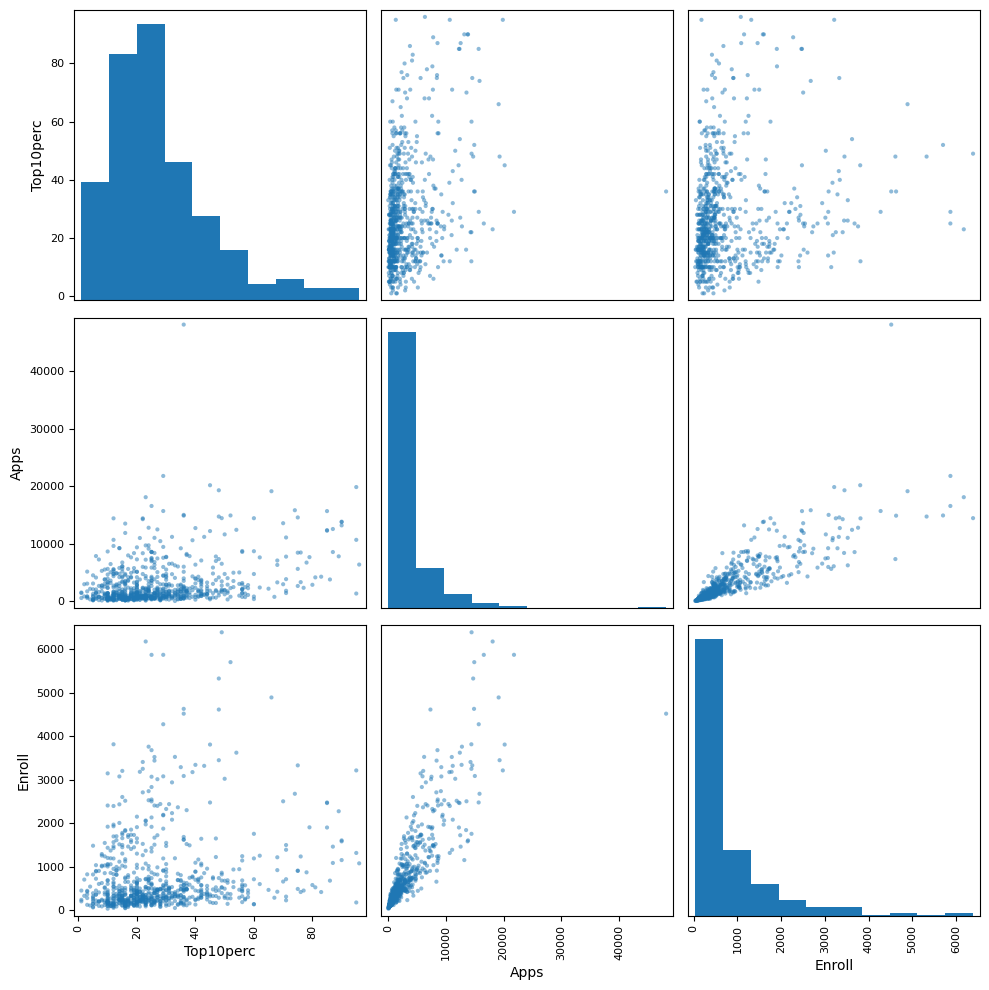

In [16]:
# Part (d): Scatter matrix
plt.figure(figsize=(10, 10))
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]], figsize=(10, 10))
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

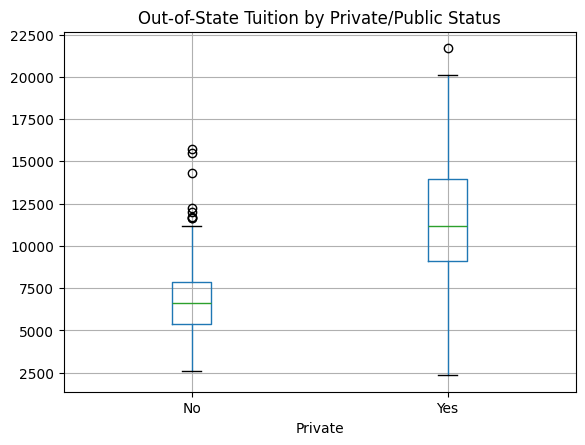

In [17]:
# Part (e): Boxplot of Outstate vs Private
plt.figure(figsize=(8, 6))
college.boxplot("Outstate", by="Private")
plt.title("Out-of-State Tuition by Private/Public Status")
plt.suptitle("")  # This removes the automatic suptitle
plt.show()


Count of Elite Universities:
Elite
No     699
Yes     78
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

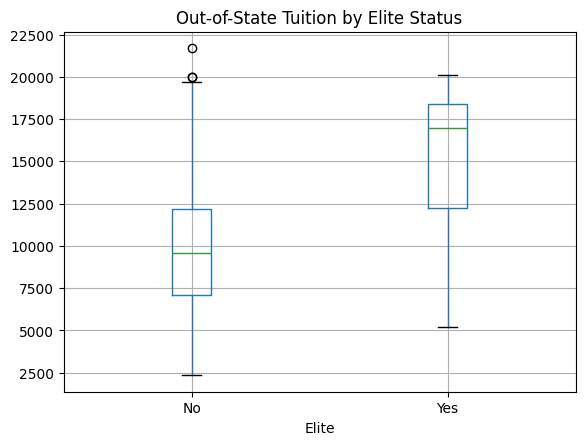

In [18]:
# Part (f): Create Elite variable and boxplot
college["Elite"] = pd.cut(college["Top10perc"], [0, 50, 100], labels=["No", "Yes"])

print("\nCount of Elite Universities:")
print(college["Elite"].value_counts())

plt.figure(figsize=(8, 6))
college.boxplot("Outstate", by="Elite")
plt.title("Out-of-State Tuition by Elite Status")
plt.suptitle("")
plt.show()

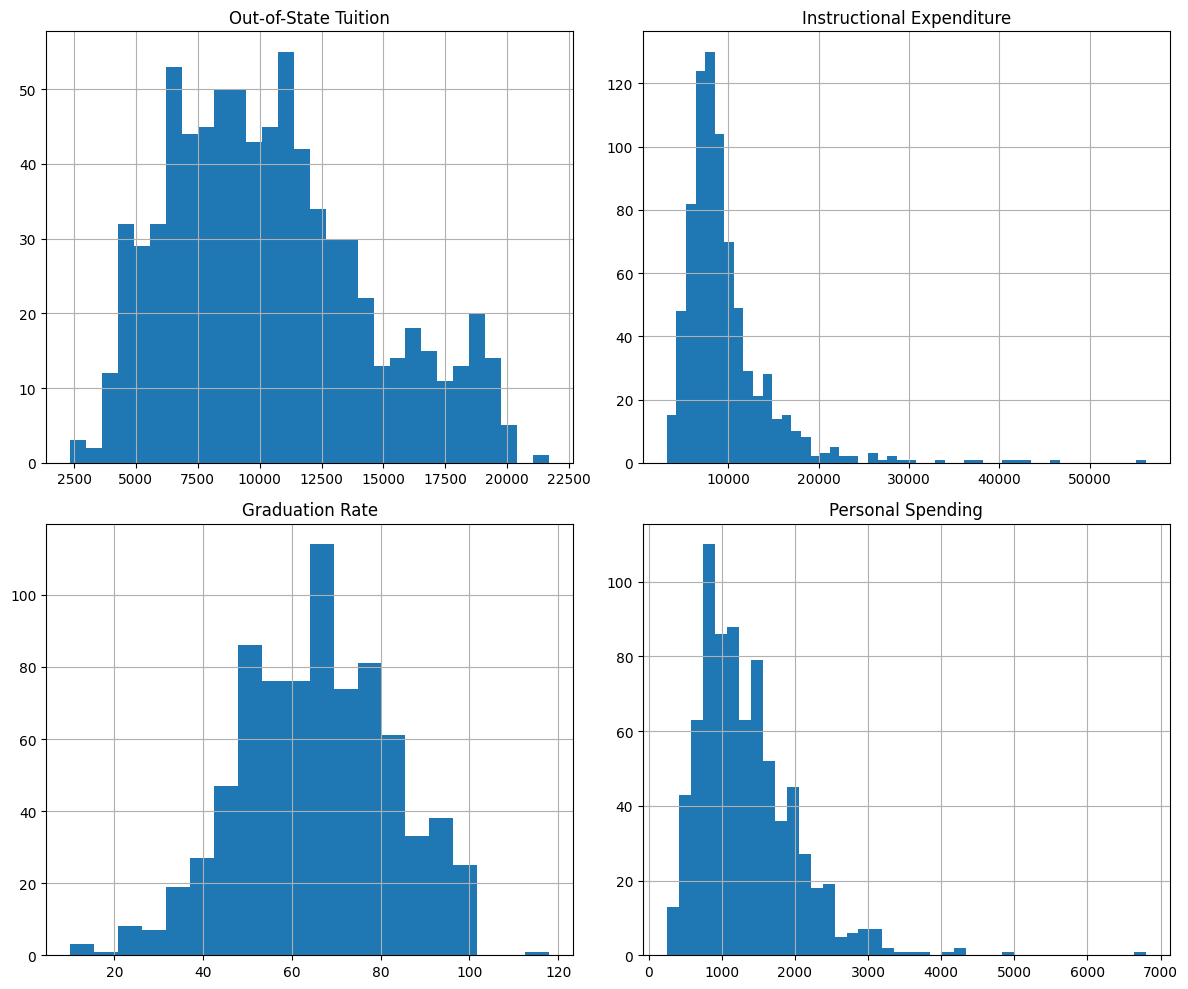

In [19]:
# Part (g): Histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create histograms for different variables with varying bins
college["Outstate"].hist(bins=30, ax=axes[0])
axes[0].set_title("Out-of-State Tuition")

college["Expend"].hist(bins=50, ax=axes[1])
axes[1].set_title("Instructional Expenditure")

college["Grad.Rate"].hist(bins=20, ax=axes[2])
axes[2].set_title("Graduation Rate")

college["Personal"].hist(bins=40, ax=axes[3])
axes[3].set_title("Personal Spending")

plt.tight_layout()
plt.show()


Correlation Analysis:
           Personal    Expend  Top10perc  Outstate  Grad.Rate
Personal   1.000000 -0.097892  -0.093316 -0.299087  -0.269344
Expend    -0.097892  1.000000   0.660913  0.672779   0.390343
Top10perc -0.093316  0.660913   1.000000  0.562331   0.494989
Outstate  -0.299087  0.672779   0.562331  1.000000   0.571290
Grad.Rate -0.269344  0.390343   0.494989  0.571290   1.000000


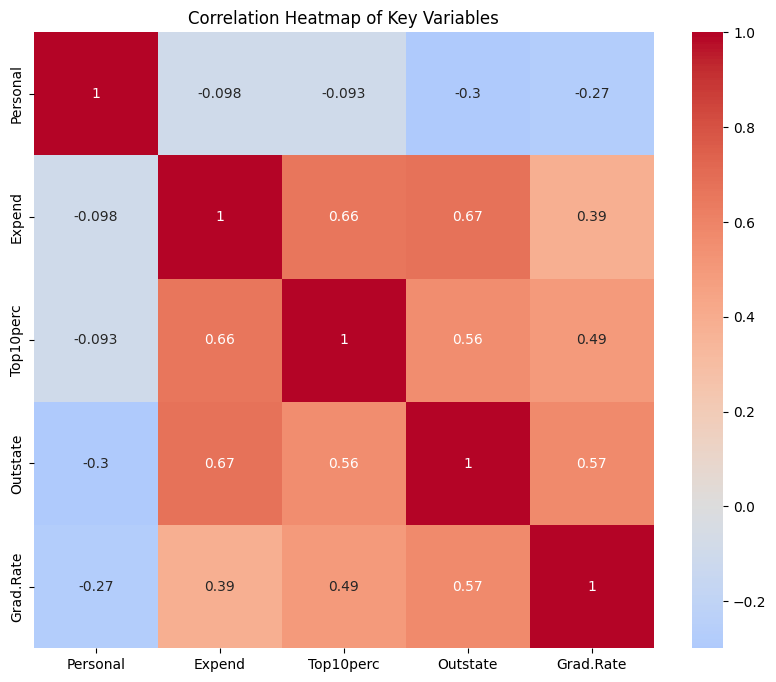


Mean Values by Elite Status:
          Personal        Expend      Outstate
Elite                                         
No     1357.655222   8684.367668   9904.165951
Yes    1188.179487  18404.871795  15248.564103


/tmp/ipykernel_30474/2702931048.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(college.groupby("Elite")[["Personal", "Expend", "Outstate"]].mean())


In [20]:
# Part (h): Additional analysis
print("\nCorrelation Analysis:")
variables_of_interest = ["Personal", "Expend", "Top10perc", "Outstate", "Grad.Rate"]
correlation_matrix = college[variables_of_interest].corr()
print(correlation_matrix)

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Key Variables")
plt.show()

# Analysis of spending patterns by Elite status
print("\nMean Values by Elite Status:")
print(college.groupby("Elite")[["Personal", "Expend", "Outstate"]].mean())